Start with looking at the dataset

Then load in necessary libraries to build the model



In [1]:
#import dataset
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


covid_path = "/content/gdrive/MyDrive/COVID-19-Dataset/COVID/images"
lung_opac_path = "/content/gdrive/MyDrive/COVID-19-Dataset/Lung_Opacity/images"
normal_path = "/content/gdrive/MyDrive/COVID-19-Dataset/Normal/images"
pneumonia_path = "/content/gdrive/MyDrive/COVID-19-Dataset/Viral Pneumonia/images"





Mounted at /content/gdrive


#Data Segmentation# 

The next part is to split the data into training and vaidation sets. I first start by making directories, then doing and 80/20 split of the data per class.

In [ ]:
import os 
#only need to run this once to make the directories 

os.mkdir('/content/gdrive/MyDrive/train')
os.mkdir('/content/gdrive/MyDrive/test')

os.mkdir('/content/gdrive/MyDrive/train/covid')
os.mkdir()

os.mkdir('/content/gdrive/MyDrive/train/normal')
os.mkdir('/content/gdrive/MyDrive/test/normal')

os.mkdir('/content/gdrive/MyDrive/train/pneumonia')
os.mkdir('/content/gdrive/MyDrive/test/pneumonia')

os.mkdir('/content/gdrive/MyDrive/train/lung_opac')
os.mkdir('/content/gdrive/MyDrive/test/lung_opac')

#Place the data into the respective training and test directories with an 80/20 split 

In [ ]:
# get length of the number of photos in each directory 
import numpy as np 
import shutil
import itertools
import glob 
import os

covid_train_len = int(np.floor(len(os.listdir(covid_path))*0.8))
covid_len = len(os.listdir(covid_path))

normal_train_len = int(np.floor(len(os.listdir(normal_path))*0.8))
normal_len = len(os.listdir(normal_path))

pneumonia_train_len = int(np.floor(len(os.listdir(pneumonia_path))*0.8))
pneumonia_len = len(os.listdir(pneumonia_path))

lung_train_len = int(np.floor(len(os.listdir(lung_opac_path))*0.8))
lung_len = len(os.listdir(lung_opac_path))

#train sets
for trainimg in itertools.islice(glob.iglob(os.path.join(covid_path, '*.png')), covid_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train/covid')
    
for trainimg in itertools.islice(glob.iglob(os.path.join(normal_path, '*.png')), normal_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train/normal')
    
for trainimg in itertools.islice(glob.iglob(os.path.join(pneumonia_path, '*.png')), pneumonia_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train/pneumonia')

for trainimg in itertools.islice(glob.iglob(os.path.join(lung_opac_path, '*.png')), lung_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train/lung_opac')

#test sets
for testimg in itertools.islice(glob.iglob(os.path.join(covid_path, '*.png')), covid_train_len, covid_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test/covid')

for testimg in itertools.islice(glob.iglob(os.path.join(normal_path, '*.png')), normal_train_len, normal_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test/normal')

for testimg in itertools.islice(glob.iglob(os.path.join(pneumonia_path, '*.png')), pneumonia_train_len, pneumonia_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test/pneumonia')

for testimg in itertools.islice(glob.iglob(os.path.join(lung_opac_path, '*.png')), lung_train_len, lung_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test/lung_opac')

In [ ]:
#make subdirectories for quicker training
# run once 
os.mkdir('/content/gdrive/MyDrive/train1')
os.mkdir('/content/gdrive/MyDrive/test1')

os.mkdir('/content/gdrive/MyDrive/train1/covid')
os.mkdir('/content/gdrive/MyDrive/test1/covid')

os.mkdir('/content/gdrive/MyDrive/train1/normal')
os.mkdir('/content/gdrive/MyDrive/test1/normal')

os.mkdir('/content/gdrive/MyDrive/train1/pneumonia')
os.mkdir('/content/gdrive/MyDrive/test1/pneumonia')

os.mkdir('/content/gdrive/MyDrive/train1/lung_opac')
os.mkdir('/content/gdrive/MyDrive/test1/lung_opac')

## Look at the size of the directories created and save the size

In [4]:
# print length of testing and training directories
import os

#train paths
covid_train = '/content/gdrive/MyDrive/train/covid'
normal_train = '/content/gdrive/MyDrive/train/normal'
pneumonia_train = '/content/gdrive/MyDrive/train/pneumonia'
lung_opac_train = '/content/gdrive/MyDrive/train/lung_opac'

print('Covid training photos is:', len(os.listdir(covid_train)))
print('Normal training photos is:', len(os.listdir(normal_train)))
print('Pnuemonia training photos is:', len(os.listdir(pneumonia_train)))
print('Lung Opacity training photos is:', len(os.listdir(lung_opac_train)))

#test paths
covid_test = '/content/gdrive/MyDrive/test/covid'
normal_test = '/content/gdrive/MyDrive/test/normal'
pneumonia_test = '/content/gdrive/MyDrive/test/pneumonia'
lung_opac_test = '/content/gdrive/MyDrive/test/lung_opac'

print('Covid test photos is:', len(os.listdir(covid_test)))
print('Normal test photos is:', len(os.listdir(normal_test)))
print('Pnuemonia test photos is:', len(os.listdir(pneumonia_test)))
print('Lung Opacity test photos is:', len(os.listdir(lung_opac_test)))

# train dataset full size
train_size  = len(os.listdir(covid_train)) + len(os.listdir(normal_train)) + len(os.listdir(pneumonia_train)) + len(os.listdir(lung_opac_train))
print('train size is: ', train_size)

# test dataset full size
test_size = len(os.listdir(covid_test)) + len(os.listdir(normal_test)) + len(os.listdir(pneumonia_test)) + len(os.listdir(lung_opac_test))
print('test size is: ', test_size)

Covid training photos is: 2892
Normal training photos is: 6304
Pnuemonia training photos is: 1076
Lung Opacity training photos is: 4814
Covid test photos is: 724
Normal test photos is: 1577
Pnuemonia test photos is: 269
Lung Opacity test photos is: 1204
train size is:  15086
test size is:  3774


# Create smaller training and test sets if necessary 

In [ ]:
import numpy as np 
import shutil
import itertools
import glob 
import os
# get subsets of data in train 1 and test 1

covid_train_len = int(np.floor(len(os.listdir(covid_train))*0.1))
covid_test_len = int(np.floor(len(os.listdir(covid_test))*0.1))

normal_train_len = int(np.floor(len(os.listdir(normal_train))*0.1))
normal_test_len = int(np.floor(len(os.listdir(normal_test))*0.1))

pneumonia_train_len = int(np.floor(len(os.listdir(pneumonia_train))*0.1))
pneumonia_test_len = int(np.floor(len(os.listdir(pneumonia_test))*0.1))

lung_train_len = int(np.floor(len(os.listdir(lung_opac_train))*0.1))
lung_test_len = int(np.floor(len(os.listdir(lung_opac_test))*0.1))

#train1 sets
for trainimg in itertools.islice(glob.iglob(os.path.join(covid_train, '*.png')), covid_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train1/covid')
    
for trainimg in itertools.islice(glob.iglob(os.path.join(normal_train, '*.png')), normal_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train1/normal')
    
for trainimg in itertools.islice(glob.iglob(os.path.join(pneumonia_train, '*.png')), pneumonia_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train1/pneumonia')

for trainimg in itertools.islice(glob.iglob(os.path.join(lung_opac_train, '*.png')), lung_train_len):
    shutil.copy(trainimg, '/content/gdrive/MyDrive/train1/lung_opac')


#test1 sets
for testimg in itertools.islice(glob.iglob(os.path.join(covid_path, '*.png')), covid_test_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test1/covid')

for testimg in itertools.islice(glob.iglob(os.path.join(normal_path, '*.png')), normal_test_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test1/normal')

for testimg in itertools.islice(glob.iglob(os.path.join(pneumonia_path, '*.png')), pneumonia_test_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test1/pneumonia')

for testimg in itertools.islice(glob.iglob(os.path.join(lung_opac_path, '*.png')), lung_test_len):
    shutil.copy(testimg, '/content/gdrive/MyDrive/test1/lung_opac')


In [ ]:


import os 
#get size of data subsets
#train paths
covid_train1 = '/content/gdrive/MyDrive/train1/covid'
normal_train1 = '/content/gdrive/MyDrive/train1/normal'
pneumonia_train1 = '/content/gdrive/MyDrive/train1/pneumonia'
lung_opac_train1 = '/content/gdrive/MyDrive/train1/lung_opac'

#test paths
covid_test1 = '/content/gdrive/MyDrive/test1/covid'
normal_test1 = '/content/gdrive/MyDrive/test1/normal'
pneumonia_test1 = '/content/gdrive/MyDrive/test1/pneumonia'
lung_opac_test1 = '/content/gdrive/MyDrive/test1/lung_opac'

# train dataset subset size
train_size1  = len(os.listdir(covid_train1)) + len(os.listdir(normal_train1)) + len(os.listdir(pneumonia_train1)) + len(os.listdir(lung_opac_train1))
print('train size is: ', train_size1)

# test dataset subset size
test_size1 = len(os.listdir(covid_test1)) + len(os.listdir(normal_test1)) + len(os.listdir(pneumonia_test1)) + len(os.listdir(lung_opac_test1))
print('test size is: ', test_size1)

train size is:  1507
test size is:  375


# Get visuals of the data 

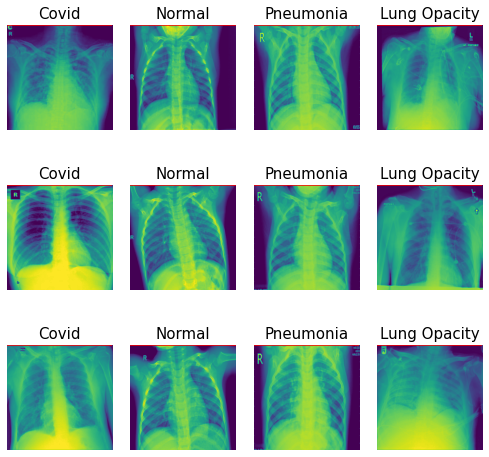

In [ ]:
### preview a photo from each branch
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import matplotlib.image as mpimg

fig, axes = plt.subplots(3, 4, figsize=(7, 7))
labels = ['Covid', 'Normal', 'Pneumonia', 'Lung Opacity']
i = 0
j = 0

images = []
# get 3 pictures from each of the training sets 

#covid, normal, pneumonia, lung opac 

images.append('/content/gdrive/MyDrive/train/covid/COVID-363.png')
images.append('/content/gdrive/MyDrive/train/normal/Normal-1115.png')
images.append("/content/gdrive/MyDrive/train/pneumonia/Viral Pneumonia-2.png")
images.append('/content/gdrive/MyDrive/train/lung_opac/Lung_Opacity-2.png')

#2nd row
images.append('/content/gdrive/MyDrive/train/covid/COVID-377.png')
images.append('/content/gdrive/MyDrive/train/normal/Normal-1116.png')
images.append('/content/gdrive/MyDrive/train/pneumonia/Viral Pneumonia-3.png')
images.append('/content/gdrive/MyDrive/train/lung_opac/Lung_Opacity-3.png')
#3rd row
images.append('/content/gdrive/MyDrive/train/covid/COVID-388.png')
images.append('/content/gdrive/MyDrive/train/normal/Normal-1117.png')
images.append('/content/gdrive/MyDrive/train/pneumonia/Viral Pneumonia-4.png')
images.append('/content/gdrive/MyDrive/train/lung_opac/Lung_Opacity-4.png')








## print out some pictures 
for row in axes:
    for plot in row:
        
        plot.imshow(cv2.imread(images[j], 0))
        plot.axhline(y=0.5, color='r')
        plot.set_title(labels[i], fontsize=15)
        plot.axis('off')
        i += 1
        j += 1
    i = 0
    
fig.tight_layout()
plt.show()

# Load in VGG19 mode with Keras

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

# packages for model 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.applications.vgg19 import VGG19

# load model


cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(228, 228, 3))

print(cnn_base.summary())

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 228, 228, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 228, 228, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 228, 228, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 114, 114, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 114, 114, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 114, 114, 128)     147584    
                                                              

# A way to get the data into features and labels

In [ ]:
# let batch size be 64 for now
batch_size = 64

def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 7, 7, 512)) 
    labels = np.zeros(shape=(sample_amount,))
    datagen = ImageDataGenerator(rescale=1./255) 
    generator = datagen.flow_from_directory(
        directory, target_size=(228, 228), 
        batch_size = batch_size, 
        class_mode='sparse',
        shuffle = True,
        seed = 42) 
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        print(features_batch.shape)
        print(labels_batch.shape)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels





In [ ]:
#training of data


#train and test folders for al of the data
train_folder = '/content/gdrive/MyDrive/train'
test_folder = '/content/gdrive/MyDrive/test'

#train and test folder paths  for 1
train1_folder = '/content/gdrive/MyDrive/train1'
test1_folder = '/content/gdrive/MyDrive/test1'


#train and test folder paths for 2
#train2_folder = '/content/gdrive/MyDrive/train2'
#test2_folder = '/content/gdrive/MyDrive/test2'


# get features and labels using the extract features function
train_features, train_labels = extract_features(train_folder, train_size) 

test_features, test_labels = extract_features(test_folder, test_size)


In [ ]:
#shape the data for the model
import numpy as np 


reshape_y = 7 * 7 * 512
train_features = np.reshape(train_features, (train_size, reshape_y))
test_features = np.reshape(test_features, (test_size, reshape_y))



# Save features and labels
os.mkdir('/content/gdrive/MyDrive/data_bottlenecked')
np.save('/content/gdrive/MyDrive/data_bottlenecked/train_features.npy', train_features)
np.save('/content/gdrive/MyDrive/data_bottlenecked/train_labels.npy', train_labels)

np.save('/content/gdrive/MyDrive/data_bottlenecked/test_features.npy', test_features)
np.save('/content/gdrive/MyDrive/data_bottlenecked/test_labels.npy', test_labels)



# Load in training features and labels

In [ ]:
import numpy as np

#reload in the data
train_features = np.load('/content/gdrive/MyDrive/data_bottlenecked/train_features.npy')
train_labels = np.load('/content/gdrive/MyDrive/data_bottlenecked/train_labels.npy')
test_features = np.load('/content/gdrive/MyDrive/data_bottlenecked/test_features.npy')
test_labels = np.load('/content/gdrive/MyDrive/data_bottlenecked/test_labels.npy')



In [3]:
shape1 = (228,228)
shape2 = (256,256)
#train and test folders for al of the data
train_folder = '/content/gdrive/MyDrive/train'
test_folder = '/content/gdrive/MyDrive/test'


train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=shape1,
     #   color_mode='grayscale',
        batch_size=64,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        test_folder,
        target_size=shape1,
     #   color_mode='grayscale',
        batch_size=64,
        shuffle=False,
        class_mode='categorical')


train_generator.class_indices

Found 15086 images belonging to 4 classes.
Found 3774 images belonging to 4 classes.


{'covid': 0, 'lung_opac': 1, 'normal': 2, 'pneumonia': 3}

In [4]:
#Validation of the model 
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
#build on top of the vgg19 model

#classifier on top of model
#model = Sequential()


#adding dense layers
# 1
#model.add(Dense(256, activation='relu', input_dim=reshape_y))
# 2
#model.add(Dense(4, activation='sigmoid'))







#compile the model
#optimize is RMSprop


headmodel = cnn_base.output
#headmodel = AveragePooling2D(pool_size =(4, 4))(headmodel)
headmodel = Flatten(name ='Flatten')(headmodel)
headmodel = Dense(64, activation = 'relu')(headmodel)
#headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = cnn_base.input, outputs = headmodel)

for layers in cnn_base.layers:
    layers.trainable = False

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


initial_epochs = 15

history = model.fit(train_generator, epochs=initial_epochs, 
                     validation_data = validation_generator, callbacks=[early_stopping])



# Save VGG19 results
#model.save('/content/gdrive/MyDrive/model_VGG_01.h5')
model.summary()

Epoch 1/15
236/236 [==============================] - 3940s 17s/step - loss: 0.8505 - accuracy: 0.7016 - val_loss: 0.6406 - val_accuracy: 0.8052
Epoch 2/15
236/236 [==============================] - 200s 845ms/step - loss: 0.5273 - accuracy: 0.8226 - val_loss: 0.5613 - val_accuracy: 0.8339
Epoch 3/15
236/236 [==============================] - 199s 842ms/step - loss: 0.4472 - accuracy: 0.8533 - val_loss: 0.5142 - val_accuracy: 0.8386
Epoch 4/15
236/236 [==============================] - 199s 844ms/step - loss: 0.4080 - accuracy: 0.8666 - val_loss: 0.4792 - val_accuracy: 0.8426
Epoch 5/15
236/236 [==============================] - 199s 843ms/step - loss: 0.3761 - accuracy: 0.8758 - val_loss: 0.4471 - val_accuracy: 0.8601
Epoch 6/15
236/236 [==============================] - 199s 844ms/step - loss: 0.3465 - accuracy: 0.8864 - val_loss: 0.4515 - val_accuracy: 0.8492
Epoch 7/15
236/236 [==============================] - 198s 840ms/step - loss: 0.3166 - accuracy: 0.8965 - val_loss: 0.3831 - 

## Second model with VGG archictecture 

In [6]:
model.evaluate(validation_generator)

59/59 [==============================] - 13s 220ms/step - loss: 0.3824 - accuracy: 0.8686


[0.38237932324409485, 0.8685744404792786]

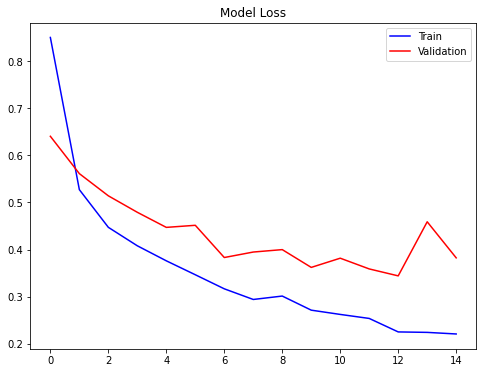

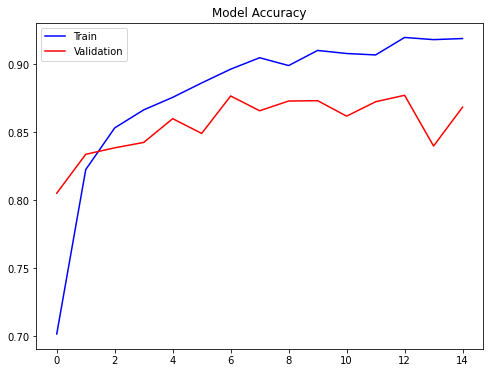

In [7]:
# Print training history
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import matplotlib.image as mpimg


def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()





plot_loss_acc(history)

